In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
%run ../Utilities/Utilities.ipynb

Using TensorFlow backend.


In [3]:
data = pd.read_pickle("../Data/Guitar/File_onset_data.pkl").reset_index(drop=True)
data.shape

(240, 2)

In [4]:
data.head()

,File,Onsets
0,Guitar_noamp_riff1.mp3,"[100, 3950, 6000, 6100, 10000, 10100, 12000, 1..."
1,Guitar_noamp_riff10.mp3,"[100, 2100, 4050, 5900, 7900, 9850, 11850, 13900]"
2,Guitar_noamp_riff10.mp3,"[100, 2100, 4050, 5900, 7900, 9850, 11850, 13900]"
3,Guitar_noamp_riff10_1.mp3,"[50, 2150, 4150, 5900, 8050, 9950, 11950, 14000]"
4,Guitar_noamp_riff10_10.mp3,"[50, 1900, 3900, 5900, 8000, 9900, 12050, 14050]"


In [5]:
data = data.drop_duplicates("File")
data = data[data["Onsets"].apply(lambda x: len(x)) != 0].reset_index(drop=True)

In [6]:
data.shape

(134, 2)

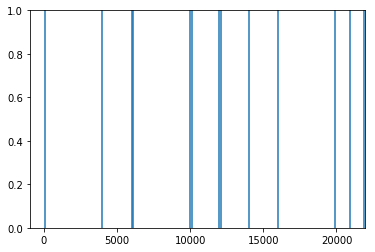

In [7]:
for x in data.loc[0, "Onsets"]:
    plt.axvline(x)

In [8]:
def remove_close_onsets(onsets, max_dist=100):
    new = []
    dif = np.array(onsets)[1:] - np.array(onsets)[:-1]
    for i in range(dif.shape[0]):
        if dif[i] > max_dist:
            new.append(onsets[i])
    new.append(onsets[-1])
    return new

In [9]:
data["Onsets"] = data["Onsets"].apply(remove_close_onsets)

Let's check out some examples and correct some missing onsets

In [34]:
from ipywidgets import interact, FloatSlider, Button, Layout, HBox

In [11]:
def f(x):
    plt.figure(figsize=(18,6))
    plt.plot(waveform(filename).y)
    plt.plot(onsets, [0]*len(onsets), "ro")
    plt.axvline(x=int(x), color="r")
    plt.show()

In [48]:
def on_button_clicked(b):
    data.loc[i, "Onsets"] = data.loc[i, "Onsets"] + [int(slider.value)]
def on_button_clicked_delay(b):
    data.loc[i, "Onsets"] = list(np.array(data.loc[i, "Onsets"]) + 50)
def on_button_clicked_next(b):
    global i
    i = np.random.randint(data.shape[0])

In [49]:
path = "../Samples/Guitar/Riffs/"

In [99]:
row = data.loc[i]
filename = path + row["File"]
onsets = row["Onsets"]

slider = FloatSlider(min=0, max=len(waveform(filename).y), step=50, continuous_update=False)
interact(f, x=slider)

button = Button(description="Add onset")
button.on_click(on_button_clicked)

button_delay = Button(description="Delay all onsets by 50")
button_delay.on_click(on_button_clicked_delay)

button_next = Button(description="Next")
button_next.on_click(on_button_clicked_next)

display(HBox([button, button_delay, button_next]))
ipd.Audio(filename)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=16513.0, step=50.0)…

In [28]:
data.loc[i, "Onsets"] = list(np.array(data.loc[i, "Onsets"]) - 100)

In [100]:
data.to_pickle("../Data/Guitar/File_onset_data_corrected.pkl")